In [3]:
import pandas as pd

In [ ]:
# upload coi_triple_160.csv using the menu bar at the left

In [4]:
df = pd.read_csv('coi_triple_160.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585059 entries, 0 to 585058
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  585059 non-null  int64  
 1   COI         585059 non-null  int64  
 2   Subject     584893 non-null  object 
 3   Relation    585059 non-null  object 
 4   Object      585055 non-null  object 
 5   Confidence  585059 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 26.8+ MB


In [ ]:
unique_relations = df['Relation'].unique()
unique_relations.size

20565

In [5]:
# for each unique relation, find out how many times it occurs
relations_counts = df.groupby('Relation').size()

relations_counts #this is a Series

Relation
% of                  2
% of is               4
'                     1
' Association is      1
' Bureau is           3
                     ..
’s veterinarian is    1
’s wife is            2
−031 to               1
−18 th                1
−200 to               1
Length: 20565, dtype: int64

In [6]:
relations_counts_df = relations_counts.to_frame(name='count')
relations_counts_df

,count
Relation,
% of,2
% of is,4
',1
' Association is,1
' Bureau is,3
...,...
’s veterinarian is,1
’s wife is,2
−031 to,1


In [7]:
sorted_relations_df = relations_counts_df.sort_values('count', ascending=False)


In [8]:
sorted_relations_df.head(50)

,count
Relation,
is,38086
are,32894
reports,23743
was,23544
were in,23261
has,16703
has received,15107
is in,14732
received,12915


In [9]:
# try sorting this by the length of the relation string, to see if there are any useful patterns there

# put the index in a column of the dataframe first so we can do vectorized operations on it
sorted_relations_df['relation_string'] = sorted_relations_df.index.to_series()

# then add the relation string's length as a column to the dataframe
sorted_relations_df['string_length'] = sorted_relations_df['relation_string'].str.len()

In [10]:
sorted_relations_df.head(50)

,count,relation_string,string_length
Relation,,,
is,38086,is,2
are,32894,are,3
reports,23743,reports,7
was,23544,was,3
were in,23261,were in,7
has,16703,has,3
has received,15107,has received,12
is in,14732,is in,5
received,12915,received,8


In [11]:
sorted_by_length_df = sorted_relations_df.sort_values('string_length')

In [12]:
sorted_by_length_df.head(50)

,count,relation_string,string_length
Relation,,,
',1,',1
ᅟ,2,ᅟ,1
s,3,s,1
is,38086,is,2
on,228,on,2
by,217,by,2
du,4,du,2
In,2,In,2
es,4,es,2


In [13]:
sorted_by_length_df.tail(50)

,count,relation_string,string_length
Relation,,,
was awarded Population Health Investigator Award from,2,was awarded Population Health Investigator Awa...,53
has received consulting advisory board honoraria from,1,has received consulting advisory board honorar...,53
has directly received travel reimbursement funds from,1,has directly received travel reimbursement fun...,53
have previously received grants research support from,4,have previously received grants research suppo...,53
was subsequently granted PhD Studentship funding from,8,was subsequently granted PhD Studentship fundi...,53
has received Chugai Pharmaceutical Ingelheim Japan as,2,has received Chugai Pharmaceutical Ingelheim J...,53
currently receives research salary grant support from,2,currently receives research salary grant suppo...,53
help patients access quality cannabis products through,2,help patients access quality cannabis products...,54
Moreover co-chairs NYU Langone Health Working Group on,2,Moreover co-chairs NYU Langone Health Working ...,54


In [14]:
import matplotlib.pyplot as plt

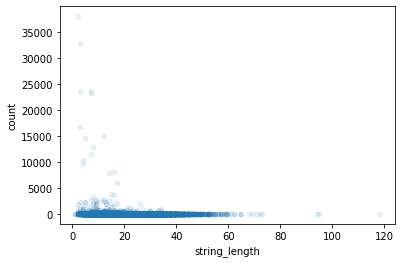

In [15]:
sorted_relations_df.plot.scatter(x='string_length', y='count', alpha=0.1)

In [ ]:
receive_df = sorted_relations_df[sorted_relations_df['relation_string'].str.contains('receiv')]

In [ ]:
receive_df

,count,relation_string,string_length
Relation,,,
has received,15107,has received,12
received,12915,received,8
receives,3216,receives,8
has received honoraria for,2015,has received honoraria for,26
have received,1870,have received,13
...,...,...,...
received travel payments to,1,received travel payments to,27
received travel payments from,1,received travel payments from,29
received travel payment to,1,received travel payment to,26


In [ ]:
employ_df = sorted_relations_df[sorted_relations_df['relation_string'].str.contains('employ')]

In [ ]:
employ_df

,count,relation_string,string_length
Relation,,,
are employees of,8140,are employees of,16
is employee of,2739,is employee of,14
is employed by,1028,is employed by,14
were employees of,498,were employees of,17
was employee of,374,was employee of,15
...,...,...,...
discloses employment at,1,discloses employment at,23
has received University employment funding In,1,has received University employment funding In,45
has received university employment funding In,1,has received university employment funding In,45


In [16]:
COI_terms = ['shareholder', 'equity', 'own', 'proprietary', 'patent', 'financial interest in', 'manager', 'employ', 'CEO', 'CFO', 'president', 'inventor', 
           'founde', 'royalties', 'stock', 'grant', 'fund', 'support', 'contract', 'collaborat', 'research', 'consul', 'advi', 'honrari', 'speak', 'talk',
           'edit', 'travel', 'member', 'panel', 'board', 'proctor', 'fee', 'remuneration', 'witness', 'lecture', 'investigator', 'teaching', 'participation',
           'trials', 'Officer', 'conference', 'accomodation', 'trustee', 'educational', 'director', 'manuscript-fee', 'partners', 'license', 'hired', 'award',
           'chair', 'associates', 'reviewing', 'intellectual property', 'leader']

In [17]:
len(COI_terms)

56

In [18]:
# remove the relations that already contain one of these strings from COI_terms (we can already use searching by substring to find these)
# Then we can analyze what remains

filter_function_for_known = lambda s: any(x in s for x in COI_terms)

sorted_relations_df['known'] = sorted_relations_df['relation_string'].apply(filter_function_for_known)

uncaptured_relations_df = sorted_relations_df.loc[sorted_relations_df['known'] == False]
uncaptured_relations_df

# TODO: This probably should look for substrings while ignoring case (i.e. treat capital and lowercase letters as same)

,count,relation_string,string_length,known
Relation,,,,
is,38086,is,2,False
are,32894,are,3,False
reports,23743,reports,7,False
was,23544,was,3,False
were in,23261,were in,7,False
...,...,...,...,...
has had relationships in,1,has had relationships in,24,False
has given testimony in,1,has given testimony in,22,False
has gone into,1,has gone into,13,False


In [19]:
# Package for string similarities (multiple measures, fuzzy comparison)
!pip install thefuzz

In [20]:
from thefuzz import fuzz
from thefuzz import process

/usr/local/lib/python3.7/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [21]:
# Use thefuzz's process.extractOne() function to find the closest fuzzy match (plus confidence, but don't trust the confidence value too much...)
# among the terms in COI_terms to each relation in uncaptured_relations_df (i.e. the relations that don't already contain one of the COI_terms as 
# a substring)

uncaptured_relations_df['best_fuzzy_match'] = uncaptured_relations_df['relation_string'].apply(lambda x: process.extractOne(x, COI_terms))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
uncaptured_relations_df.head(50)
# unfortunately these best_fuzzy_match answers don't seem to be too useful. A couple are useful, especially where the COI_term contained a typo.

,count,relation_string,string_length,known,best_fuzzy_match
Relation,,,,,
is,38086,is,2,False,"(advi, 60)"
are,32894,are,3,False,"(shareholder, 90)"
reports,23743,reports,7,False,"(CEO, 60)"
was,23544,was,3,False,"(trials, 60)"
were in,23261,were in,7,False,"(financial interest in, 86)"
has,16703,has,3,False,"(shareholder, 60)"
has received,15107,has received,12,False,"(CEO, 60)"
is in,14732,is in,5,False,"(financial interest in, 86)"
received,12915,received,8,False,"(CEO, 60)"


Below here: initial experiments with thefuzz

In [ ]:
# try out the string similarity metrics on an example
coi_term_example = "employ"
relation_example = "are employees of"
print(fuzz.ratio(coi_term_example, relation_example))
print(fuzz.partial_ratio(coi_term_example, relation_example))
print(fuzz.token_sort_ratio(coi_term_example, relation_example))
print(fuzz.token_set_ratio(coi_term_example, relation_example))

55
100
55
55


In [ ]:
# try out fuzz.process() on a set of strings (finds most similar among the set)
relation_example = 'currently receives research salary grant support from'
#COI_terms = ['shareholder', 'equity', 'own', 'proprietary', 'patent', 'financial interest in', 'manager', 'employ', 'CEO', 'CFO', 'president', 'inventor', 
#           'founde', 'royalties', 'stock', 'grant', 'fund', 'support', 'contract', 'collaborat', 'research', 'consul', 'advi', 'honrari', 'speak', 'talk',
#           'edit', 'travel', 'member', 'panel', 'board', 'proctor', 'fee', 'remuneration', 'witness', 'lecture', 'investigator', 'teaching', 'participation',
#           'trials', 'Officer', 'conference', 'accomodation', 'trustee', 'educational', 'director', 'manuscript-fee', 'partners', 'license', 'hired', 'award',
#           'chair', 'associates', 'reviewing', 'intellectual property', 'leader']

In [ ]:
process.extract(relation_example, COI_terms, limit=10)

[('support', 90),
 ('research', 90),
 ('grant', 60),
 ('lecture', 51),
 ('investigator', 45),
 ('teaching', 45),
 ('conference', 45),
 ('manuscript-fee', 45),
 ('contract', 43),
 ('partners', 43)]

In [ ]:
process.extract('are employees of', COI_terms)

[('employ', 90), ('fee', 60), ('leader', 45), ('royalties', 40), ('stock', 40)]

In [ ]:
process.extract('platypus', COI_terms)

[('partners', 50),
 ('participation', 45),
 ('patent', 43),
 ('employ', 43),
 ('intellectual property', 41)]

In [ ]:
process.extract('zzz', COI_terms)

[('shareholder', 0),
 ('equity', 0),
 ('own', 0),
 ('proprietary', 0),
 ('patent', 0)]

In [ ]:
whatsthis = process.extractOne(sorted_relations_df['relation_string'], COI_terms)

TypeError: ignored

In [ ]:
# apply extractOne to all the relations in sorted_relations_df's 'relation_string' column
whatsthis = sorted_relations_df['relation_string'].apply(lambda x: process.extractOne(x, COI_terms))

In [ ]:
whatsthis.head()

Relation
is                          (advi, 60)
are                  (shareholder, 90)
reports                      (CEO, 60)
was                       (trials, 60)
were in    (financial interest in, 86)
Name: relation_string, dtype: object

In [ ]:
whatsthis

Relation
is                                            (advi, 60)
are                                    (shareholder, 90)
reports                                        (CEO, 60)
was                                         (trials, 60)
were in                      (financial interest in, 86)
                                        ...             
has grant funding via                        (grant, 90)
received travel grants to                    (grant, 90)
has had discussions For                        (own, 60)
has had grants in                            (grant, 90)
−200 to                                        (own, 45)
Name: relation_string, Length: 20565, dtype: object